In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pickle

In [3]:
#reading the dataset
data = pd.read_csv("Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Cleaning the data

In [5]:
# Drop the 'Unnamed: 32' column and the 'id' column as they are unnecessary
data_cleaned = data.drop(['Unnamed: 32', 'id'], axis=1)

# Check if any columns have missing values
missing_values = data_cleaned.isnull().sum()

# Display cleaned dataset and missing values summary
data_cleaned.head(), missing_values

(  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0         M        17.99         10.38          122.80     1001.0   
 1         M        20.57         17.77          132.90     1326.0   
 2         M        19.69         21.25          130.00     1203.0   
 3         M        11.42         20.38           77.58      386.1   
 4         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
 0         0.2419  ...         25.38

 Visualization

<ipython-input-6-bf0bcbbf674f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_cleaned, palette='Set2')


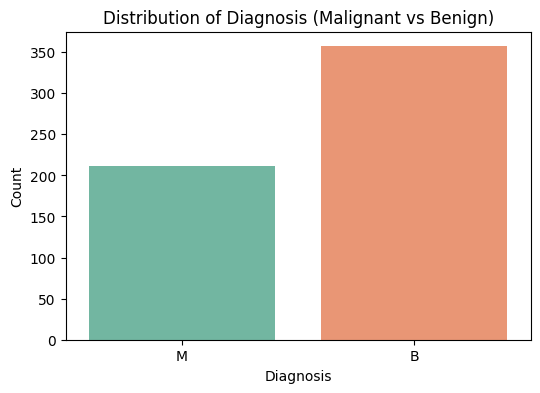

In [6]:
# Plot the distribution of the diagnosis variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data_cleaned, palette='Set2')
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

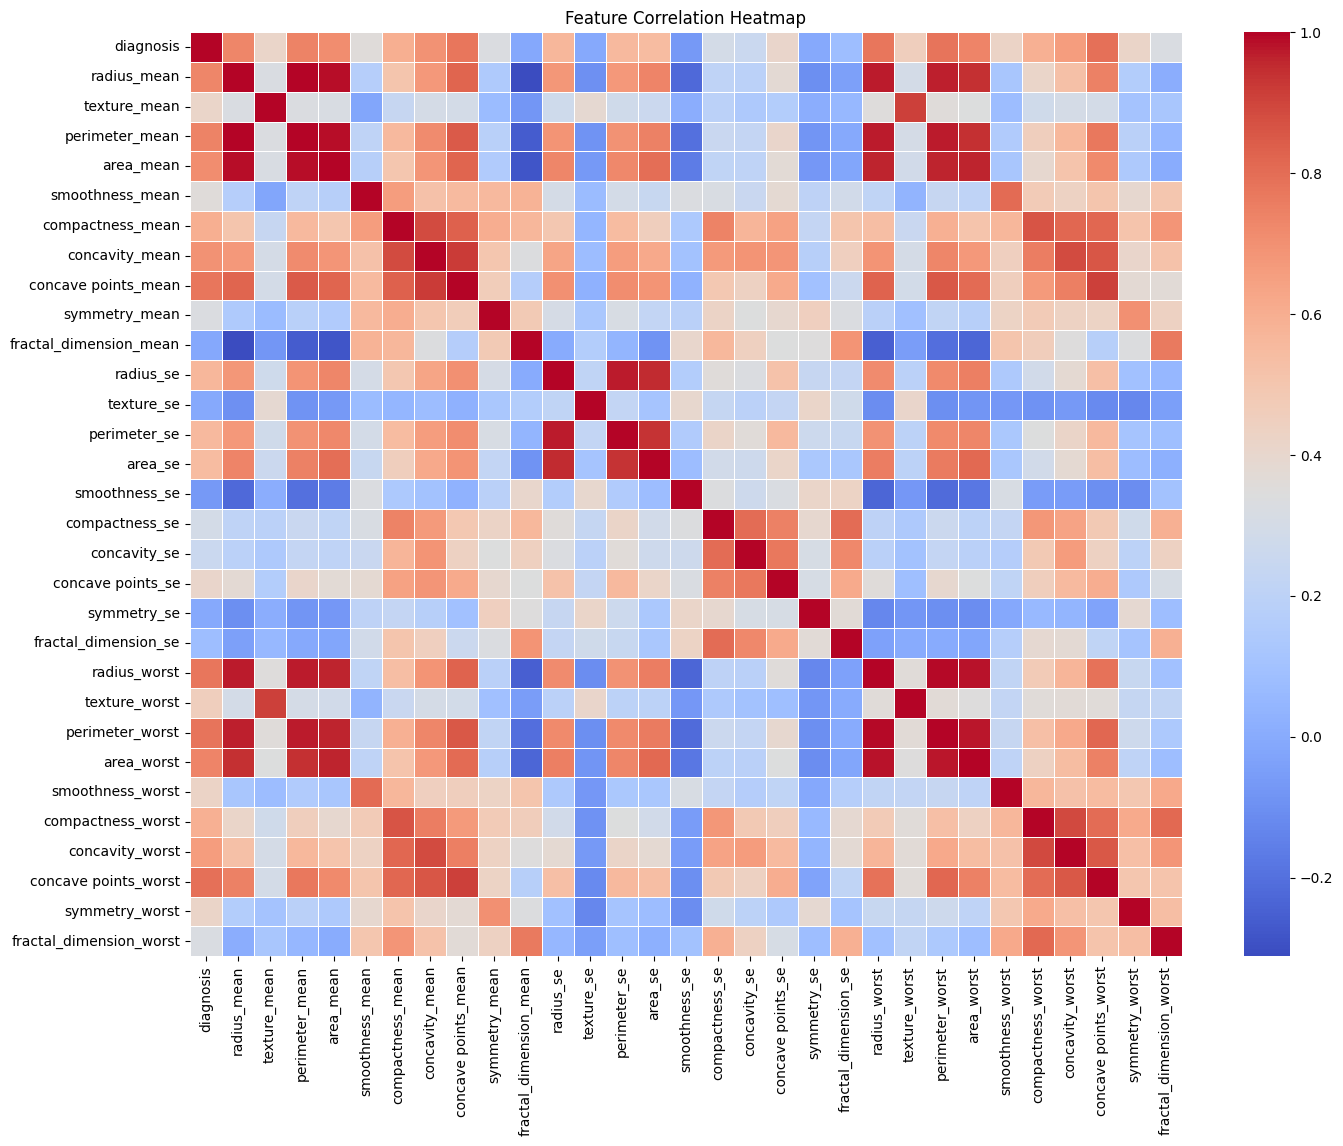

In [7]:
# Convert diagnosis to binary (M = 1, B = 0) for analysis and model building
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Plot the correlation heatmap for the features
plt.figure(figsize=(16, 12))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
# Load and clean the data (assuming data_cleaned already exists)
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

In [9]:
# Select two features for visualization (e.g., radius_mean and texture_mean)
X_viz = data_cleaned[['radius_mean', 'texture_mean']]
y_viz = y

In [10]:
# Ensure there are at least two classes
print("Classes in training set:", np.unique(y_viz))


Classes in training set: [0 1]


In [11]:
# Split the data into training and testing sets for visualization (80% train, 20% test)
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_viz, test_size=0.2, random_state=42)

In [12]:
# Standardize the two features
scaler = StandardScaler()
X_train_viz_scaled = scaler.fit_transform(X_train_viz)
X_test_viz_scaled = scaler.transform(X_test_viz)

In [13]:
# Train logistic regression model on the selected features
model_viz = LogisticRegression(max_iter=10000)
model_viz.fit(X_train_viz_scaled, y_train_viz)

LogisticRegression(max_iter=10000)

In [14]:
# Predictions, accuracy, classification report, and confusion matrix
y_pred_viz = model_viz.predict(X_test_viz_scaled)
accuracy_viz = accuracy_score(y_test_viz, y_pred_viz)
class_report_viz = classification_report(y_test_viz, y_pred_viz)
conf_matrix_viz = confusion_matrix(y_test_viz, y_pred_viz)

In [15]:
# Display results
print("Accuracy:", accuracy_viz)
print("\nClassification Report:\n", class_report_viz)
print("\nConfusion Matrix:\n", conf_matrix_viz)

Accuracy: 0.9035087719298246

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114


Confusion Matrix:
 [[67  4]
 [ 7 36]]


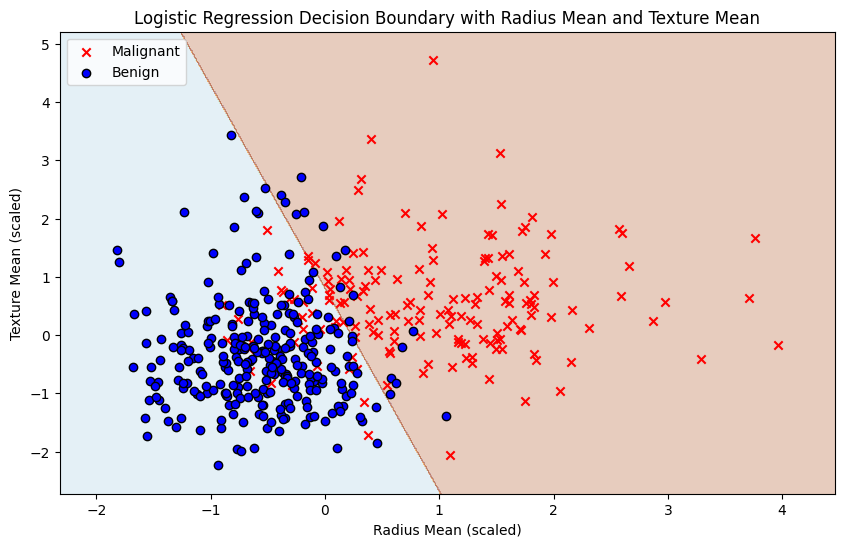

In [16]:
# Updated plot with symbols for malignant (red cross) and benign (blue dot)

# Plot decision boundary for visualization
x_min, x_max = X_train_viz_scaled[:, 0].min() - 0.5, X_train_viz_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_viz_scaled[:, 1].min() - 0.5, X_train_viz_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Separate malignant and benign for different symbols
malignant = y_train_viz == 1
benign = y_train_viz == 0

# Plot with different symbols
plt.scatter(X_train_viz_scaled[malignant, 0], X_train_viz_scaled[malignant, 1], color='red', marker='x', label="Malignant")
plt.scatter(X_train_viz_scaled[benign, 0], X_train_viz_scaled[benign, 1], color='blue', marker='o', label="Benign", edgecolors='k')

# Add labels and legend
plt.xlabel("Radius Mean (scaled)")
plt.ylabel("Texture Mean (scaled)")
plt.title("Logistic Regression Decision Boundary with Radius Mean and Texture Mean")
plt.legend(loc="upper left")
plt.show()

In [17]:
# Import necessary libraries
import numpy as np

# Function to take user input for new cancer data
def predict_cancer():
    print("\nEnter the values for the features:")
    try:
        # Accept input for the two features used in this model
        radius_mean = float(input("Enter radius_mean: "))
        texture_mean = float(input("Enter texture_mean: "))

        # Create an array from the input
        new_data = np.array([[radius_mean, texture_mean]])

        # Scale the input data using the same scaler
        new_data_scaled = scaler.transform(new_data)

        # Make predictions using the trained model
        prediction = model_viz.predict(new_data_scaled)
        prediction_prob = model_viz.predict_proba(new_data_scaled)

        # Map prediction to diagnosis
        diagnosis = "Malignant" if prediction[0] == 1 else "Benign"

        # Display the prediction
        print(f"\nPrediction: {diagnosis}")
        print(f"Prediction probabilities: {prediction_prob}")
    except Exception as e:
        print(f"Error in input or prediction: {e}")

# Call the prediction function
predict_cancer()



Enter the values for the features:
Enter radius_mean: 12.2
Enter texture_mean: 5.6

Prediction: Benign
Prediction probabilities: [[0.99475372 0.00524628]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
